<a href="https://colab.research.google.com/github/eloifabius/ML/blob/main/classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Copie de cancer_classification.csv')

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df.shape

(569, 31)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


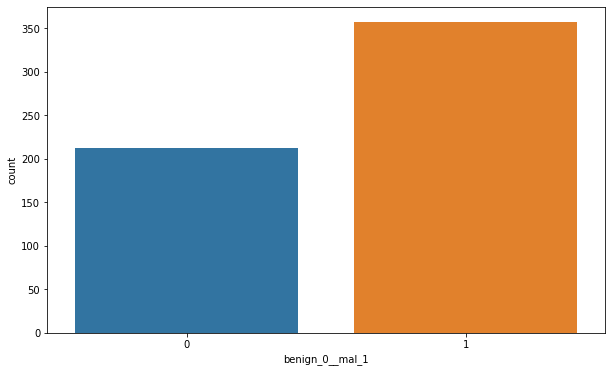

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='benign_0__mal_1', data=df)

In [17]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


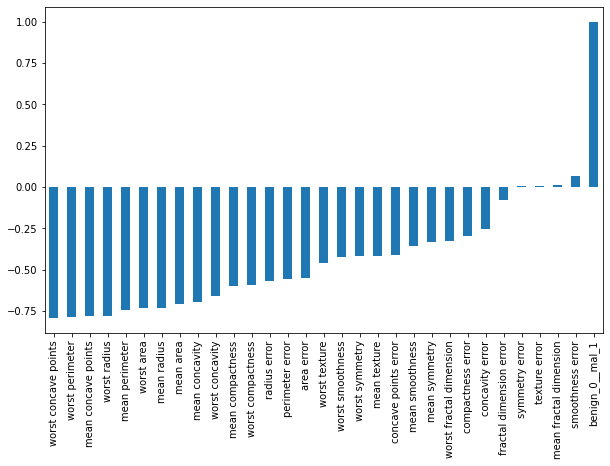

In [21]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

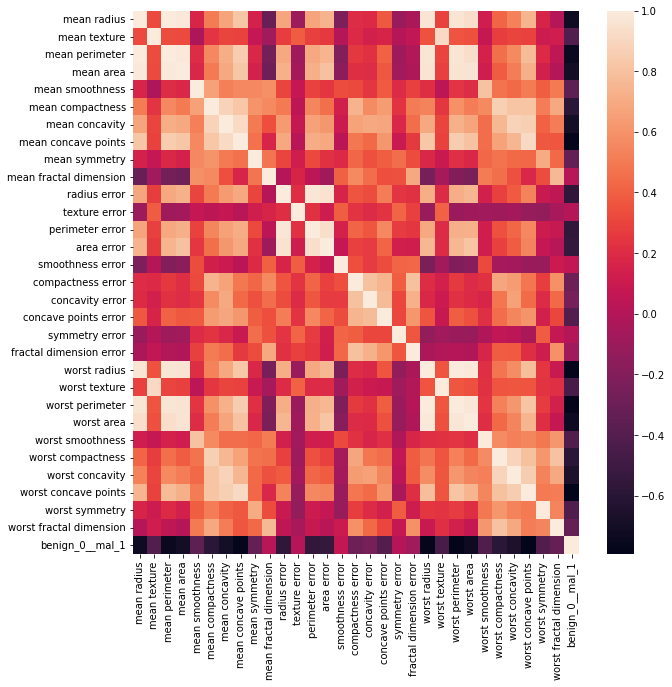

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [25]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [32]:
X_train.shape

(426, 30)

In [33]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6920 - val_loss: 0.6648
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6549 - val_loss: 0.6373
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6236 - val_loss: 0.6013
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5758 - val_loss: 0.5514
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5263 - val_loss: 0.5013
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4778 - val_loss: 0.4520
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4325 - val_loss: 0.4047
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3887 - val_loss: 0.3631
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3483 - val_loss: 0.3200
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3087 - val_loss: 0.2851
Epoch 11

In [36]:
loss_val = pd.DataFrame(model.history.history)
loss_val

,loss,val_loss
0,0.691974,0.664819
1,0.654853,0.637284
2,0.623560,0.601287
3,0.575787,0.551394
4,0.526322,0.501276
...,...,...
595,0.012078,0.295230
596,0.010892,0.291010
597,0.009400,0.254189
598,0.009065,0.282750


<Figure size 720x720 with 0 Axes>

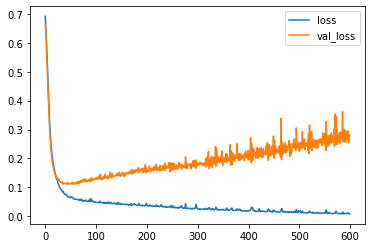

In [40]:
plt.figure(figsize=(10,10))
loss_val.plot()

In [41]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [45]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6896 - val_loss: 0.6801
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6759 - val_loss: 0.6669
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6607 - val_loss: 0.6489
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6402 - val_loss: 0.6235
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6109 - val_loss: 0.5790
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5592 - val_loss: 0.5298
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5110 - val_loss: 0.4803
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4613 - val_loss: 0.4289
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4125 - val_loss: 0.3790
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3646 - val_loss: 0.3319
Epoch 11

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,0.689600,0.680061
1,0.675852,0.666939
2,0.660717,0.648908
3,0.640226,0.623509
4,0.610938,0.579004
...,...,...
66,0.059076,0.111053
67,0.056919,0.105278
68,0.057057,0.116718
69,0.057147,0.111451


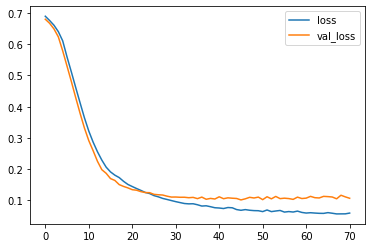

In [47]:
model_loss.plot()

In [49]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.7032 - val_loss: 0.6670
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6820 - val_loss: 0.6477
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6527 - val_loss: 0.6257
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6473 - val_loss: 0.6034
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6099 - val_loss: 0.5692
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6192 - val_loss: 0.5379
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5913 - val_loss: 0.5161
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5668 - val_loss: 0.4915
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5458 - val_loss: 0.4663
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5199 - val_loss: 0.4404
Epoch 11

In [51]:
model_losses = pd.DataFrame(model.history.history)

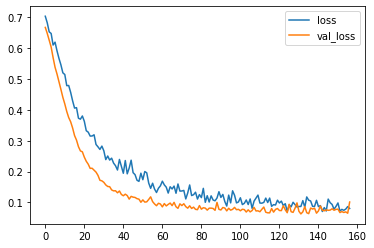

In [53]:
model_losses.plot()

In [56]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [60]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 5 83]]
